#Case Study: Predicting Wins Using Moneyball Principles

##Project Overview

###Objective:
To identify which baseball performance metrics (e.g., On-Base Percentage, Slugging, Runs) best predict team wins, using data-driven analysis aligned with the "Moneyball" strategy.

###Context:
Inspired by the Oakland A’s front office use of sabermetrics, this project investigates which undervalued metrics contribute most to team success using historical baseball data.

| Variable                                 | Description            |
| ---------------------------------------- | ---------------------- |
| `Team`, `League`, `Year`                 | Team-level identifiers |
| `W`                                      | Wins                   |
| `RS`, `RA`                               | Runs scored/allowed    |
| `OBP`, `SLG`, `BA`                       | Offensive stats        |
| `OOBP`, `OSLG`                           | Opponent stats         |
| `Playoffs`, `RankPlayoffs`, `RankSeason` | Outcome indicators     |
| `G`                                      | Games played           |

#Libraries, Directory, and Data

We begin by importing needed libraries, datasets for our analysis.

In [6]:
#Change Directory
%cd /content/drive/MyDrive/Business Analytics/Statistics and Descriptive Analytics/Basic Statistics

/content/drive/MyDrive/Business Analytics/Statistics and Descriptive Analytics/Basic Statistics


In [25]:
#Libraries
import pandas as pd
import seaborn as sns

In [24]:
#load the dataset
df = pd.read_csv("Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


#Mean

In [9]:
#Mean of Runs Scored (RS)
df.RS.mean()

np.float64(715.0819805194806)

In [10]:
#Mean of Runs Scored (RS) by the Arizona Team (ARI)
df.loc[df.Team == "ARI"].RS.mean()

np.float64(742.2)

In [11]:
#Mean of Runs Scored (RS) by the Arizona Team (ARI) since 2005
df.loc[(df.Team == "ARI") & (df.Year > 2005)].RS.mean()

np.float64(729.0)

In [12]:
#Question: What is the mean of Runs Allowed (RA) by the Chicago team (CHC)
# Until 2007
df.loc[(df.Team =="CHC") & (df.Year < 2007)].RA.mean()

np.float64(728.170731707317)

#Median

In [13]:
#Median and Mean of Wins (W)
print(df.W.mean())
df.W.median()

80.90422077922078


81.0

In [14]:
#Question: What is the median of Wins of the Baltimore Team (BAL) until 2000
df.loc[(df.Team == "BAL") & (df.Year < 2000)].W.median()

89.5

#Mode

In [15]:
# Mode, Median and Mean of OBP
print(df.OBP.mean())
print(df.OBP.median())
df.OBP.mode()

0.32633116883116886
0.326


,OBP
0,0.322


In [16]:
#Question: Mode of OBP during the year 2010?
df.loc[df.Year == 2010].OBP.mode()

,OBP
0,0.332


#Correlation

In [17]:
#Pick Variables
df_correlation = df[["RS", "RA", "W"]]
df_correlation.head(1)

,RS,RA,W
0,734,688,81


In [18]:
#Correlation Matrix
df_correlation.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

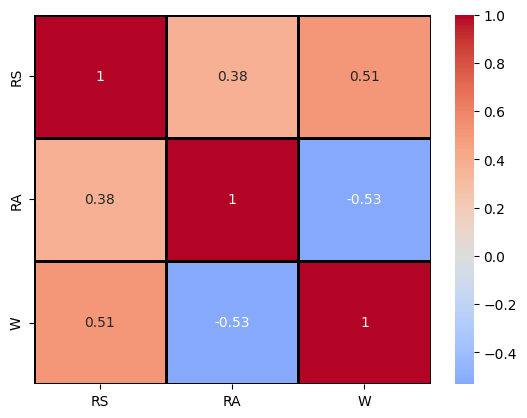

In [19]:
#Correlation Heatmap
sns.heatmap(data = df_correlation.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

In [20]:
#challenge: Corrleation Matrix between OBP, SLG, and BA. Create a Heatmap with 2 paramters changed.
df_correlation2 = df[['OBP', 'SLG', 'BA']]
df_correlation.corr()


,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

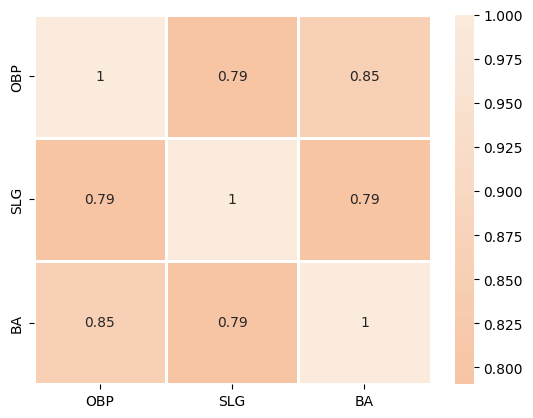

In [21]:
# Heatmap
sns.heatmap(df_correlation2.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'rocket',
            linewidth = 1,
            linecolor = 'white')

In [22]:
#standard Deviation
print(df.OOBP.mean())
df.OOBP.std()

0.3322642857142857


0.015295316041389943

In [23]:
#Question: What is the Standard Deviation of BA?
print(df.BA.mean())
df.BA.std()

0.25927272727272727


0.012907228928000327